In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('my2.csv')
print('The length of the File : ', len(df))
df.head()

The length of the File :  173043


,time,sa2_2018_code,ta_2018_code,region_2018_code,local,domestic,international,unknown,count
0,2019-03-11 00:00:00,316700,60,13,2526,345,474,666,4011
1,2019-03-11 01:00:00,316700,60,13,2151,276,429,531,3387
2,2019-03-11 02:00:00,316700,60,13,2109,258,333,507,3207
3,2019-03-11 03:00:00,316700,60,13,2241,312,408,474,3435
4,2019-03-11 04:00:00,316700,60,13,2442,342,492,423,3699


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173043 entries, 0 to 173042
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   time              173043 non-null  object
 1   sa2_2018_code     173043 non-null  int64 
 2   ta_2018_code      173043 non-null  int64 
 3   region_2018_code  173043 non-null  int64 
 4   local             173043 non-null  int64 
 5   domestic          173043 non-null  int64 
 6   international     173043 non-null  int64 
 7   unknown           173043 non-null  int64 
 8   count             173043 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 11.9+ MB


In [4]:
df['time'] = pd.to_datetime(df['time'].str.strip())
df.dtypes

time                datetime64[ns]
sa2_2018_code                int64
ta_2018_code                 int64
region_2018_code             int64
local                        int64
domestic                     int64
international                int64
unknown                      int64
count                        int64
dtype: object

In [5]:
df_new = pd.read_csv('my_new.csv')
df_new.head()
print('The length of the new dataset: ', len(df_new))

The length of the new dataset:  173160


In [6]:
df_new['time'] = pd.to_datetime(df_new['time'].str.strip())
df_new.dtypes

time                datetime64[ns]
sa2_2018_code                int64
ta_2018_code                 int64
region_2018_code             int64
local                        int64
domestic                     int64
international                int64
unknown                      int64
count                        int64
dtype: object

In [7]:
all_data = pd.concat([df,df_new], ignore_index=True)
len(all_data)
#all_data.head()

346203

In [8]:
all_data.drop_duplicates(inplace=True)
len(all_data)

230139

In [10]:
all_data = all_data.rename(columns={'count': 'total'})

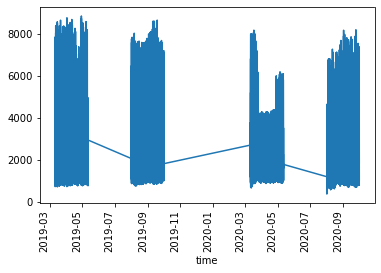

In [18]:
all_data.sort_values(['time'],ascending=True).set_index('time').local.plot(rot=90)

In [15]:
mask = (all_data['time'] > '03/21/2020') & (all_data['time'] <= '30/03/2020')
df4 = (all_data.loc[mask])
len(df4)

8424

In [16]:
df4.head()

,time,sa2_2018_code,ta_2018_code,region_2018_code,local,domestic,international,unknown,total
58273,2020-03-21 01:00:00,316700,60,13,2709,444,411,240,3804
58274,2020-03-21 02:00:00,316700,60,13,2718,420,453,246,3837
58275,2020-03-21 03:00:00,316700,60,13,2763,450,483,234,3930
58276,2020-03-21 04:00:00,316700,60,13,2898,474,507,243,4122
58277,2020-03-21 05:00:00,316700,60,13,3057,486,567,258,4368


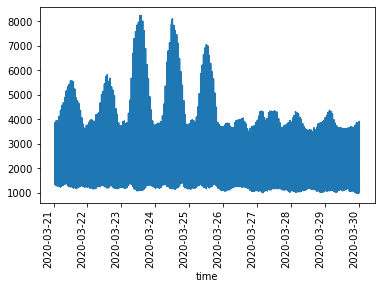

In [17]:
df4.sort_values(['time'],ascending=True).set_index('time').total.plot(rot=90, kind='line')

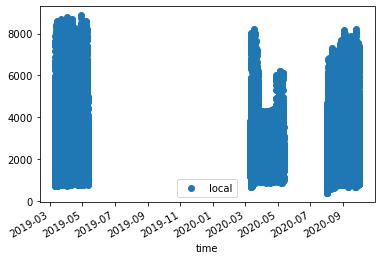

In [4]:
df.plot(x='time', y='local', style='o')

In [5]:
df.groupby('sa2_2018_code').size().count()

39

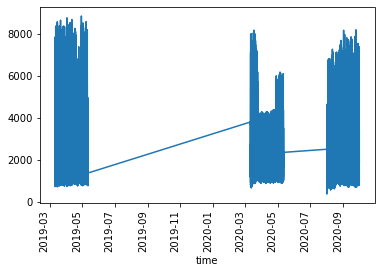

In [6]:
df.sort_values(['time'],ascending=True).set_index('time').local.plot(rot=90)

In [34]:
df2 = pd.read_csv('traffic.csv')
len(df2)

5128

In [35]:
df2.head()

,Day,Type,Region,Site no longer used,Total,Site Location,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,3/12/2018,Heavy Vehicles,Wellington,N,2405.0,Ngauranga,NaN,Caveats for the data,NaN
1,4/12/2018,Heavy Vehicles,Wellington,N,2474.5,Ngauranga,NaN,- Data is representative of the change of tra...,NaN
2,5/12/2018,Heavy Vehicles,Wellington,N,2419.5,Ngauranga,NaN,- Data is current at 28 August 2020.,NaN
3,6/12/2018,Heavy Vehicles,Wellington,N,2216.0,Ngauranga,NaN,- Data is based on the latest five weekday av...,NaN
4,7/12/2018,Heavy Vehicles,Wellington,N,2458.5,Ngauranga,NaN,- Data is sourced from Waka Kotahi New Zealan...,NaN


In [36]:
df3 = df2.loc[df2['Region'] == 'Christchurch']
print(len(df3))

776


In [37]:
df3.head()

,Day,Type,Region,Site no longer used,Total,Site Location,Unnamed: 6,Unnamed: 7,Unnamed: 8
2560,3/12/2018,Light Vehicles,Christchurch,N,15380.50,Main Nth Rd,NaN,NaN,NaN
2561,4/12/2018,Light Vehicles,Christchurch,N,15517.30,Main Nth Rd,NaN,NaN,NaN
2562,5/12/2018,Light Vehicles,Christchurch,N,16027.45,Main Nth Rd,NaN,NaN,NaN
2563,6/12/2018,Light Vehicles,Christchurch,N,16507.20,Main Nth Rd,NaN,NaN,NaN
2564,7/12/2018,Light Vehicles,Christchurch,N,16720.00,Main Nth Rd,NaN,NaN,NaN


In [38]:
df3['Day'] = pd.to_datetime(df3['Day'].str.strip())
df3.dtypes

/home/rangika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Day                    datetime64[ns]
Type                           object
Region                         object
Site no longer used            object
Total                         float64
Site Location                  object
Unnamed: 6                    float64
Unnamed: 7                     object
Unnamed: 8                     object
dtype: object

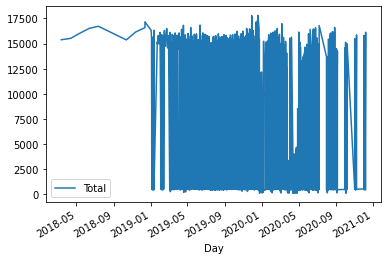

In [39]:
df3.plot(x='Day', y='Total')

In [40]:
mask = (df3['Day'] > '03/11/2020') & (df3['Day'] <= '05/11/2020')
df4 = (df3.loc[mask])
len(df4)

72

In [41]:
df4.head()

,Day,Type,Region,Site no longer used,Total,Site Location,Unnamed: 6,Unnamed: 7,Unnamed: 8
2840,2020-04-02,Light Vehicles,Christchurch,N,15083.0,Main Nth Rd,NaN,NaN,NaN
2841,2020-05-02,Light Vehicles,Christchurch,N,16145.5,Main Nth Rd,NaN,NaN,NaN
2861,2020-04-03,Light Vehicles,Christchurch,N,15554.0,Main Nth Rd,NaN,NaN,NaN
2862,2020-05-03,Light Vehicles,Christchurch,N,15829.5,Main Nth Rd,NaN,NaN,NaN
2863,2020-03-19,Light Vehicles,Christchurch,N,15218.0,Main Nth Rd,NaN,NaN,NaN


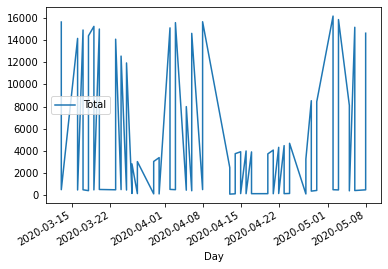

In [44]:
df4.plot(x='Day', y='Total', kind='line')

In [16]:
df_nick = pd.read_csv('export.tsv', sep='\t')
print(len(df_nick))

3778408


In [17]:
df_nick.head()

,camId,datetime,JSON_LENGTH(detections)
0,256,2020-04-03 01:44:45,1
1,256,2020-04-03 01:46:45,5
2,256,2020-04-03 01:48:44,0
3,256,2020-04-03 01:50:47,0
4,256,2020-04-03 01:52:48,2


In [18]:
df_nick['datetime'] = pd.to_datetime(df_nick['datetime'].str.strip())
df_nick.dtypes

camId                               int64
datetime                   datetime64[ns]
JSON_LENGTH(detections)             int64
dtype: object

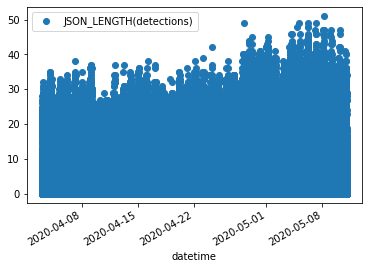

In [19]:
df_nick.plot(x='datetime', y='JSON_LENGTH(detections)', style='o')

In [20]:
df_nz = pd.read_csv('2020_NZ_Region_Mobility_Report.csv')
print(len(df_nz))
df_nz.head()

3836


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,2020-02-15,8.0,5.0,0.0,8.0,4.0,0.0
1,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,2020-02-16,4.0,4.0,-11.0,7.0,0.0,1.0
2,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,2020-02-17,-2.0,-2.0,-5.0,15.0,31.0,-3.0
3,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,2020-02-18,-1.0,2.0,1.0,8.0,15.0,-1.0
4,NZ,New Zealand,NaN,NaN,NaN,NaN,NaN,2020-02-19,1.0,2.0,0.0,11.0,14.0,-2.0


The length of the new dataset:  173160


In [22]:
df_new['time'] = pd.to_datetime(df_new['time'].str.strip())
df_new.dtypes

time                datetime64[ns]
sa2_2018_code                int64
ta_2018_code                 int64
region_2018_code             int64
local                        int64
domestic                     int64
international                int64
unknown                      int64
count                        int64
dtype: object

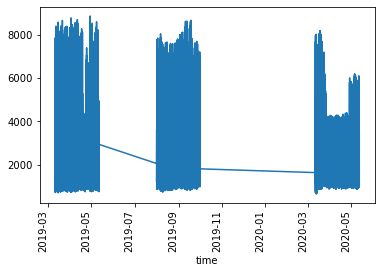

In [23]:
df_new.sort_values(['time'],ascending=True).set_index('time').local.plot(rot=90)

In [24]:
df_apple = pd.read_csv('/home/rangika/Documents/PHD/DATA/applemobilitytrends-2020-10-25.csv')
df_apple.head()

/home/rangika/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,117.39,128.99,137.88,114.93,112.42,115.57,113.05,118.95,126.12,132.18
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,142.26,142.22,125.67,149.77,139.79,156.89,134.75,136.38,138.34,133.82
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,84.94,88.93,48.76,52.73,55.55,60.31,58.52,78.61,80.43,37.91
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,69.59,62.42,34.40,42.97,43.36,45.56,43.31,60.31,61.53,25.54
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,99.65,85.42,92.72,94.60,97.68,100.26,102.98,97.19,77.39,87.40


In [25]:
df_apple = df_apple[df_apple['region'] == 'Sri Lanka']
print(len(df_apple))


0


In [26]:
df_apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25


In [27]:
df_apple_walking = df_apple[df_apple['transportation_type'] == 'walking']
df_apple_walking.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25


In [28]:
df_apple_walking = df_apple_walking.drop('geo_type', 1)
df_apple_walking = df_apple_walking.drop('region', 1)
df_apple_walking = df_apple_walking.drop('transportation_type', 1)
df_apple_walking = df_apple_walking.drop('alternative_name', 1)
df_apple_walking = df_apple_walking.drop('sub-region', 1)
df_apple_walking = df_apple_walking.drop('country', 1)

In [29]:
df_apple_walking.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25


In [30]:
df_apple_walking.T.plot(kind= 'bar', rot=90)

TypeError: no numeric data to plot

In [14]:
df_export  = pd.read_csv('export.tsv', sep='\t')
df_export.head()

,camId,datetime,JSON_LENGTH(detections)
0,256,2020-04-03 01:44:45,1
1,256,2020-04-03 01:46:45,5
2,256,2020-04-03 01:48:44,0
3,256,2020-04-03 01:50:47,0
4,256,2020-04-03 01:52:48,2


In [15]:
len(df_export)

3778408

In [5]:
df_export_261 = df_export[df_export['camId'] == 261]
print('The number of records : ', len(df_export_261))
df_export_261.head()

The number of records :  36998


,camId,datetime,JSON_LENGTH(detections)
117745,261,2020-04-03 01:44:45,2
117746,261,2020-04-03 01:45:25,8
117747,261,2020-04-03 01:46:44,3
117748,261,2020-04-03 01:47:23,1
117749,261,2020-04-03 01:48:43,4


In [6]:
df_export_261.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36998 entries, 117745 to 154742
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   camId                    36998 non-null  int64 
 1   datetime                 36998 non-null  object
 2   JSON_LENGTH(detections)  36998 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
df_export_261['datetime'] = pd.to_datetime(df_export_261['datetime'].str.strip())
df_export_261.dtypes

/home/rangika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


camId                               int64
datetime                   datetime64[ns]
JSON_LENGTH(detections)             int64
dtype: object

In [12]:
df_export_261.rename(columns={'JSON_LENGTH(detections)': 'detections'}, inplace=True)

/home/rangika/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


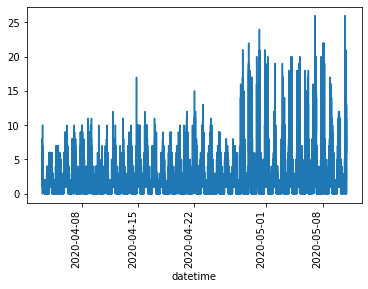

In [13]:
df_export_261.sort_values(['datetime'],ascending=True).set_index('datetime').detections.plot(rot=90)